# Preparación del notebook

In [23]:
import warnings

warnings.filterwarnings("ignore") #ignorar algunos mensajes

In [24]:
# Importar librerias necesarias
import pandas as pd # Lectura del dataset
import numpy as np # Operar listas y operaciones matematicas
import seaborn as sns 
import matplotlib.pyplot as plt #Graficas
from sklearn.linear_model import LinearRegression #funcion de la regresion lineal 

%matplotlib inline

# Regresión Lineal

**Caso de estudio**

La industria automovilística es extremadamente competitiva. Con el aumento de los precios del combustible y los consumidores exigentes, los fabricantes de automóviles optimizan constantemente sus procesos para aumentar la eficiencia del combustible. Pero, ¿qué pasaría si se pudiera disponer de un estimador fiable de las millas por galón (mpg) de un coche a partir de algunas especificaciones conocidas sobre el automóvil?

Dispone de un conjunto de datos de características de automóviles de diferentes modelos y marcas. A continuación se detallan las variables disponibles:

* mpg: millas por galón. Esta es la cantidad de combustible consumido por el vehículo particular de una instancia.
* cylinders: Este atributo describe el número de cilindros de cada automóvil
* displacement: Describe la cilindrada del motor
* Horsepower: Potencia de un automóvil
* Weight: Peso de cada automóvil
* Acceleration: Aceleración de automóvil
* Model Year: El año en que se lanzó el modelo de automóvil
* Origin: País de fabricación del automóvil
* Car Name: Nombre del automóvil

Documentación del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html




In [25]:
# Lectura de los datos
#df_auto = pd.read_csv('data/auto-mpg.csv')
df_auto = pd.read_csv("https://raw.githubusercontent.com/mlondono-oc/LEA2/main/Modulo-2/data/auto-mpg.csv", na_values='?')

In [26]:
df_auto #verifico que si me descarga la base de datos

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [27]:
# 1: USA
# 2: Europe
# 3: Japan

df_auto.head() #imprimir las 5 primeras filas 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [28]:
df_auto[df_auto['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


## Exploración de los datos

In [29]:
# Tamaño del dataset
df_auto.shape

(398, 9)

In [30]:
# Información general del dataset
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [33]:
# Exploración de los datos (estadisticas basicas)
df_auto.describe()

,target,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [32]:
# Preparación inicial de los datos
df_auto.drop(['car name'], axis=1, inplace=True) # Eliminamos la variable car name porque no la necesitamos 
df_auto = df_auto.rename(columns={'mpg':'target'}) # cambiamos la variable miles per gallon por target para entender mejor el objetivo 
df_auto = df_auto[df_auto['horsepower'].notna()] #excluir los datos nulos en la variable horsepower  (diferentes a na)

In [35]:
df_auto.head()

,target,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [36]:
df_auto.shape

(392, 8)

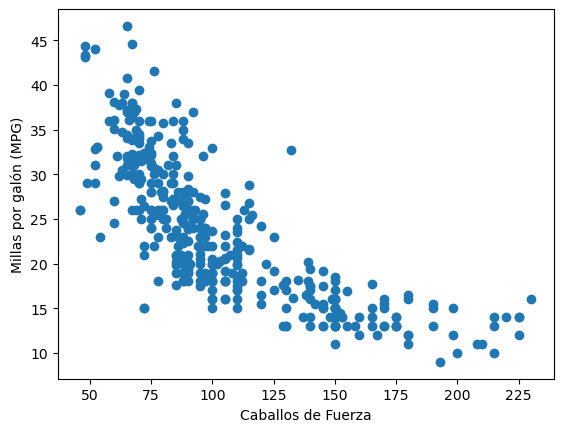

In [37]:
#MODELO DE REGRESIÓN LINEAL SIMPLLE
# Miremos la relación entre la variable objetivo y los caballos de fuerza
fig, ax  = plt.subplots(1, 1)
ax.scatter(df_auto.horsepower, df_auto.target)
ax.set_xlabel('Caballos de Fuerza')
ax.set_ylabel('Millas por galón (MPG)')
plt.show()


## Marco de validación

In [38]:
# Separemos la variable de entrada de la variable objetivo
df_rls =df_auto[['target', 'horsepower']] #definir un data frame para la regresión lineal simple
y = df_rls['target'] # Separar variable objetivo

#x = df_rls['horsepower'] 
x = df_rls.drop(['target'], axis = 1) #variable x, columna de caballos de fuerza

In [41]:
# Separación de los datos de entrenamiento y validación
from sklearn.model_selection import train_test_split #de la libreria sklearn importamos la funcion split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #el dataset de validacion es del 20% porque es el mas usado
# lo ideal es reservar la mayor cantidad posible para el entrenamiento (variar el split puede dar resultados diferentes). usamos semilla aleatoria

#verificar el tamaño de los dataset
print(f"El tamaño del dataset de entrenamiento es: {x_train.shape}")
print(f"El tamaño del dataset de validación es: {x_test.shape}")

El tamaño del dataset de entrenamiento es: (313, 1)
El tamaño del dataset de validación es: (79, 1)


## Regresión Lineal Simple

La regresión lineal simple tiene solo 1 variable predictora y 1 variable dependiente. A partir del conjunto de datos anterior, consideremos el efecto de los caballos de fuerza en el 'mpg' del vehículo.

In [42]:
# Se usa la función LinearRegresion() para
# estimar el modelo de regresión lineal.

# 1. Crea el modelo
model_rls = LinearRegression()

# 2. Calibra el modelo
model_rls.fit(x_train, y_train)

# Imprime los coeficientes
print(f"Coeficientes: {model_rls.coef_}")

# Imprime el intercepto
print(f"Intercepto: {model_rls.intercept_}")

Coeficientes: [-0.16259724]
Intercepto: 40.606097600118346


In [43]:
# Pronostico para los datos de entrenamiento con el metodo predict
y_pred_train = model_rls.predict(x_train)

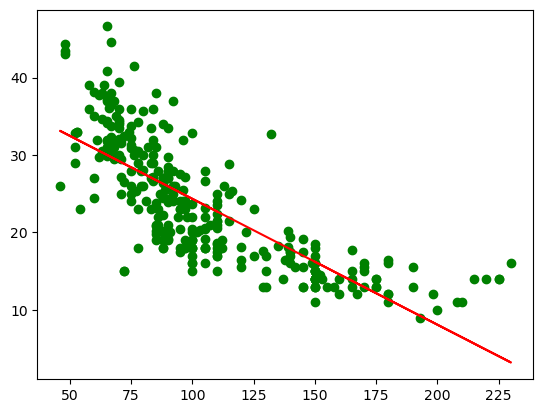

In [44]:
# Miremos como se ajusta el modelo a los datos 

#diagrama de dispersión 
plt.scatter(x_train, y_train, color = 'g')
plt.plot(x_train, y_pred_train, color = 'r')
plt.show() #mostrar grafica

## Evaluación del modelo de regresión lineal

In [46]:
# Predicciones del modelo
y_pred_test = model_rls.predict(x_test) 

In [47]:
# Métricas de evaluación
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error #importamos el modulo para metricas
import math

# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test)) #y test = datos realses

# RMSE
print("RMSE %.2f" %  math.sqrt(mean_squared_error(y_test, y_pred_test)))

#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred_test))

#MAPE
print("mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, y_pred_test))

# R2
print("Variance score: %.2f" % r2_score(y_test, y_pred_test))

# R2-adjusted
r2 = r2_score(y_test, y_pred_test)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)


#al analizar los datos obtenidos el modelo no es tan bueno (por ser regresión lineal simple), si le agregamos más variables es posible que
#el modelo mejore (regresión lineal multiple)

Mean squared error: 22.15
RMSE 4.71
Mean absolute error: 3.78
mean absolute percentage error: 0.18
Variance score: 0.57
R2-adjusted: 0.56


## Regresion Lineal Multiple

**Ejercicio**

Realice nuevamente el entrenamiento del modelo de regresión lineal utilizando las variables: horsepower, displacement, weight como características

In [48]:
# Separemos las variables de entrada de la variable objetivo
data_rlm = df_auto[['target', 'horsepower', 'displacement', 'weight']]
y = data_rlm['target']
x = data_rlm.drop(['target'], axis=1)

In [49]:
# Separación de los datos de entrenamiento y validación

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"El tamaño del dataset de entrenamiento es: {x_train.shape}")
print(f"El tamaño del dataset de validación es: {x_test.shape}")


El tamaño del dataset de entrenamiento es: (313, 3)
El tamaño del dataset de validación es: (79, 3)


In [51]:
# Se usa la función LinearRegresion() para
# estimar el modelo de regresión lineal.

# 1. Crea el modelo
model_rlm = LinearRegression()

# 2. Calibra el modelo 
model_rlm.fit(x_train, y_train)

# Imprime los coeficientes
print(f"Coeficientes: {model_rlm.coef_}")

# Imprime el intercepto
print(f"Intercepto: {model_rlm.intercept_}")


Coeficientes: [-0.04328646 -0.00881229 -0.00520866]
Intercepto: 45.403543281290396


In [52]:
# Predicciones
y_pred_test = model_rlm.predict(x_test)

In [53]:
# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))

# RMSE
print("RMSE %.2f" %  math.sqrt(mean_squared_error(y_test, y_pred_test)))

#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred_test))

#MAPE
print("mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, y_pred_test))

# R2
print("Variance score: %.2f" % r2_score(y_test, y_pred_test))

# R2-adjusted
r2 = r2_score(y_test, y_pred_test)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

Mean squared error: 18.01
RMSE 4.24
Mean absolute error: 3.51
mean absolute percentage error: 0.16
Variance score: 0.65
R2-adjusted: 0.63
